In [2]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
train = pd.read_csv('../input/final-2/final (2).csv')
train.describe()

,TotalAmountOverCreditLimit,age,Count3059,DebtRatio,Salary,NumberOfOpenCredits,Count90,NumberOfArrests,Count6089,Dependents,Target
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000,150000.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+05,8.452760,0.265973,1.018240,0.240387,0.757222,0.066840
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+06,5.145951,4.169304,1.129771,4.155179,1.115086,0.249746
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+05,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+05,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+05,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+08,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TotalAmountOverCreditLimit  150000 non-null  float64
 1   age                         150000 non-null  int64  
 2   Count3059                   150000 non-null  int64  
 3   DebtRatio                   150000 non-null  float64
 4   Salary                      120269 non-null  float64
 5   NumberOfOpenCredits         150000 non-null  int64  
 6   Count90                     150000 non-null  int64  
 7   NumberOfArrests             150000 non-null  int64  
 8   Count6089                   150000 non-null  int64  
 9   Dependents                  146076 non-null  float64
 10  Target                      150000 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [5]:
train.corr()

,TotalAmountOverCreditLimit,age,Count3059,DebtRatio,Salary,NumberOfOpenCredits,Count90,NumberOfArrests,Count6089,Dependents,Target
TotalAmountOverCreditLimit,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557,-0.001802
age,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303,-0.115386
Count3059,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680,0.125587
DebtRatio,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673,-0.007602
Salary,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647,-0.019746
NumberOfOpenCredits,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322,-0.029669
Count90,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176,0.117175
NumberOfArrests,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684,-0.007038
Count6089,-0.001048,-0.057159,0.987005,-0.007533,-0.011116,-0.071077,0.992796,-0.039722,1.000000,-0.010922,0.102261
Dependents,0.001557,-0.213303,-0.002680,-0.040673,0.062647,0.065322,-0.010176,0.124684,-0.010922,1.000000,0.046048


In [6]:
def detect_outliers(df,n,features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

# detect outliers from Age, SibSp , Parch and Fare
# These are the numerical features present in the dataset
Outliers = detect_outliers(train,2,list(train.drop('Target',axis=1).columns))


In [7]:
train.loc[Outliers]


,TotalAmountOverCreditLimit,age,Count3059,DebtRatio,Salary,NumberOfOpenCredits,Count90,NumberOfArrests,Count6089,Dependents,Target
900,2.258964,33,2,0.032484,200000.0,1,1,0,0,2.0,0
919,1.362142,73,1,274.000000,NaN,2,3,0,1,NaN,1
1958,1.634551,28,0,151.000000,NaN,1,3,0,2,0.0,0
4852,1.566866,46,2,0.104983,600000.0,3,2,0,0,0.0,0
5956,2.237856,60,6,2597.000000,100.0,16,1,2,1,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...
117338,0.960692,42,0,1.241580,377000.0,29,1,2,1,3.0,1
126682,0.344297,38,0,1.789158,450000.0,23,14,11,1,0.0,1
129570,0.075067,58,0,0.298925,1738800.0,24,0,6,1,0.0,0
5833,0.917527,44,0,1.852144,380000.0,13,1,7,1,1.0,1


In [8]:
train.corr()

,TotalAmountOverCreditLimit,age,Count3059,DebtRatio,Salary,NumberOfOpenCredits,Count90,NumberOfArrests,Count6089,Dependents,Target
TotalAmountOverCreditLimit,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557,-0.001802
age,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303,-0.115386
Count3059,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680,0.125587
DebtRatio,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673,-0.007602
Salary,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647,-0.019746
NumberOfOpenCredits,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322,-0.029669
Count90,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176,0.117175
NumberOfArrests,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684,-0.007038
Count6089,-0.001048,-0.057159,0.987005,-0.007533,-0.011116,-0.071077,0.992796,-0.039722,1.000000,-0.010922,0.102261
Dependents,0.001557,-0.213303,-0.002680,-0.040673,0.062647,0.065322,-0.010176,0.124684,-0.010922,1.000000,0.046048


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


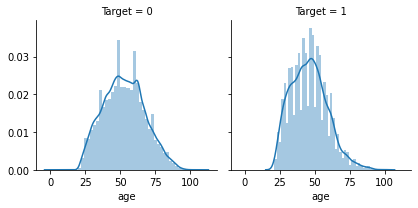

In [9]:
plot = sns.FacetGrid(train, col='Target')
plot = plot.map(sns.distplot, "age")

In [10]:
train.age = pd.qcut(train.age.values, 6).codes


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


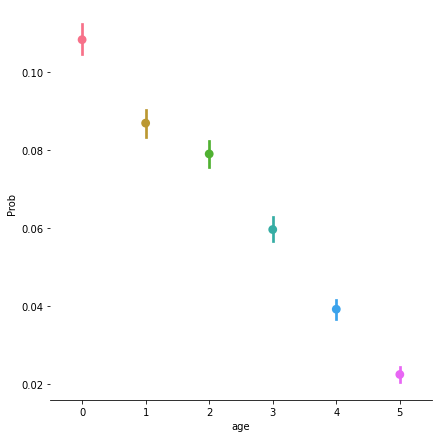

In [11]:
plot  = sns.factorplot(x="age",y="Target",data=train, size = 6 , 
palette = "husl")
plot.despine(left=True)
plot = plot.set_ylabels("Prob")

In [12]:
train.DebtRatio = pd.qcut(train.DebtRatio.values, 6).codes


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


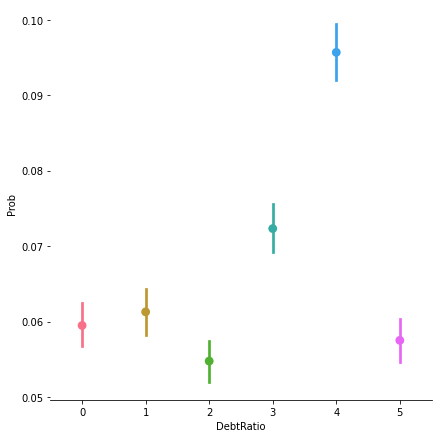

In [13]:
plot  = sns.factorplot(x="DebtRatio",y="Target",data=train, size = 6 , 
palette = "husl")
plot.despine(left=True)
plot = plot.set_ylabels("Prob")

In [14]:
train.TotalAmountOverCreditLimit = pd.qcut(train.TotalAmountOverCreditLimit.values, 6).codes


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


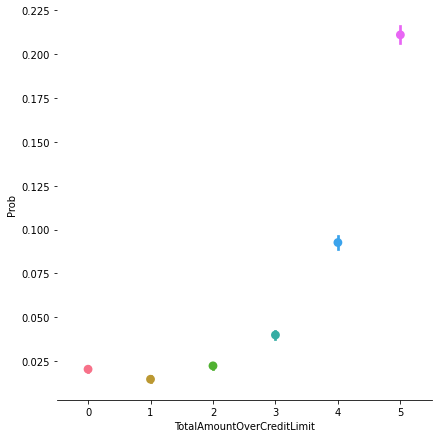

In [15]:
plot  = sns.factorplot(x="TotalAmountOverCreditLimit",y="Target",data=train, size = 6 , 
palette = "husl")
plot.despine(left=True)
plot = plot.set_ylabels("Prob")

In [16]:
train.Salary = train.Salary.fillna(train.Salary.median())


In [17]:
train.Salary = pd.qcut(train.Salary.values, 6).codes


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


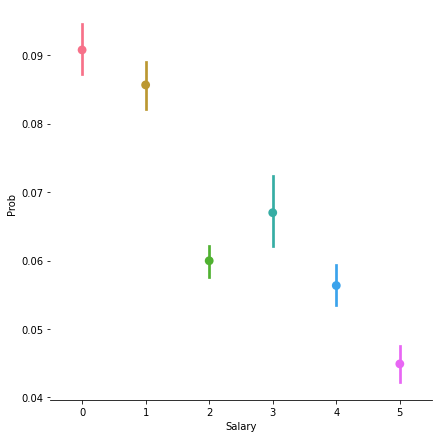

In [18]:
plot  = sns.factorplot(x="Salary",y="Target",data=train, size = 6 , 
palette = "husl")
plot.despine(left=True)
plot = plot.set_ylabels("Prob")

In [19]:
train.NumberOfOpenCredits = pd.qcut(train.NumberOfOpenCredits.values, 6).codes


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


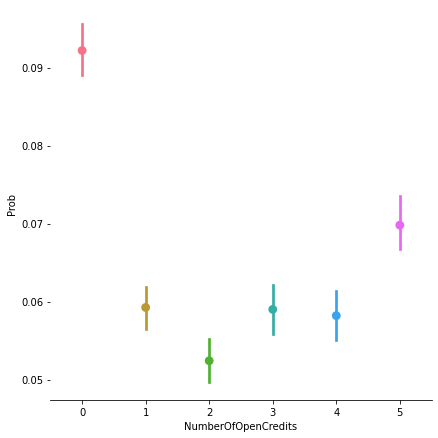

In [20]:
plot  = sns.factorplot(x="NumberOfOpenCredits",y="Target",data=train, size = 6 , 
palette = "husl")
plot.despine(left=True)
plot = plot.set_ylabels("Prob")

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


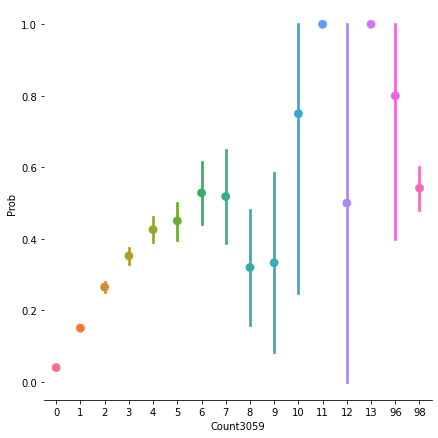

In [21]:
plot  = sns.factorplot(x="Count3059",y="Target",data=train, size = 6 , 
palette = "husl")
plot.despine(left=True)
plot = plot.set_ylabels("Prob")

In [22]:
for i in range(len(train)):
    if train.Count3059[i] >= 6:
        train.Count3059[i] = 6

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


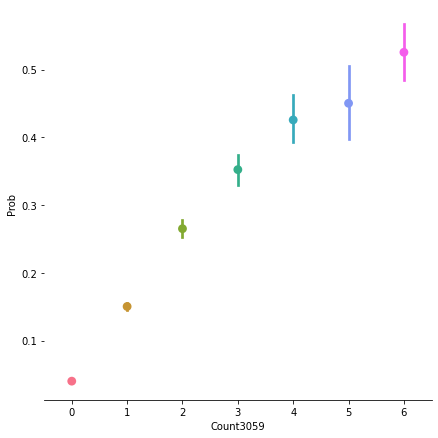

In [23]:
plot  = sns.factorplot(x="Count3059",y="Target",data=train, size = 6 , 
palette = "husl")
plot.despine(left=True)
plot = plot.set_ylabels("Prob")

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


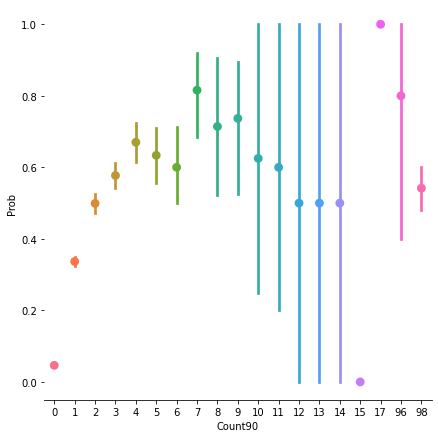

In [24]:
plot  = sns.factorplot(x="Count90",y="Target",data=train, size = 6 , 
palette = "husl")
plot.despine(left=True)
plot = plot.set_ylabels("Prob")

In [25]:
for i in range(len(train)):
    if train.Count90[i] >= 6:
        train.Count90[i] = 6

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


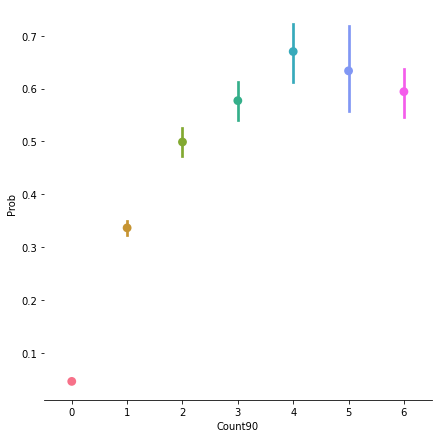

In [26]:
plot  = sns.factorplot(x="Count90",y="Target",data=train, size = 6 , 
palette = "husl")
plot.despine(left=True)
plot = plot.set_ylabels("Prob")

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


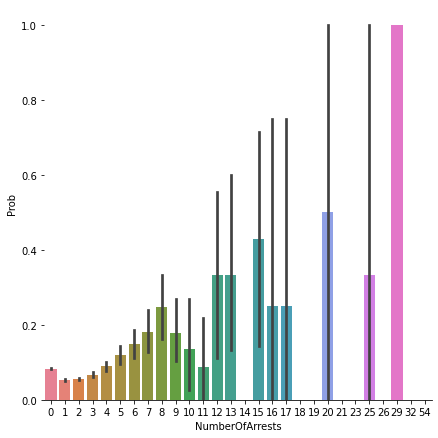

In [27]:
plot  = sns.factorplot(x="NumberOfArrests",y="Target",data=train,kind="bar" ,size = 6 , 
palette = "husl")
plot.despine(left=True)
plot = plot.set_ylabels("Prob")

In [28]:
for i in range(len(train)):
    if train.NumberOfArrests[i] >= 7:
        train.NumberOfArrests[i] = 7

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


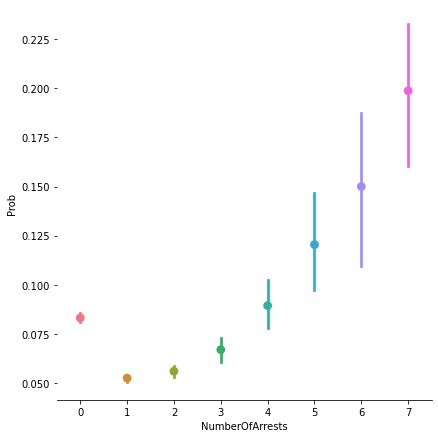

In [29]:
plot  = sns.factorplot(x="NumberOfArrests",y="Target",data=train ,size = 6 , 
palette = "husl")
plot.despine(left=True)
plot = plot.set_ylabels("Prob")

In [30]:
train.Dependents = train.Dependents.fillna(train.Dependents.median())


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


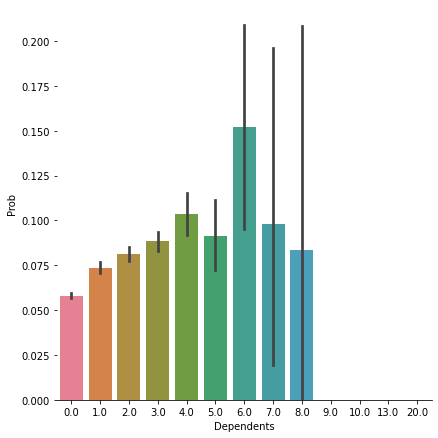

In [31]:
plot  = sns.factorplot(x="Dependents",y="Target",data=train,kind="bar" ,size = 6 , 
palette = "husl")
plot.despine(left=True)
plot = plot.set_ylabels("Prob")

In [32]:
for i in range(len(train)):
    if train.Dependents[i] >= 5:
        train.Dependents[i] = 5

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


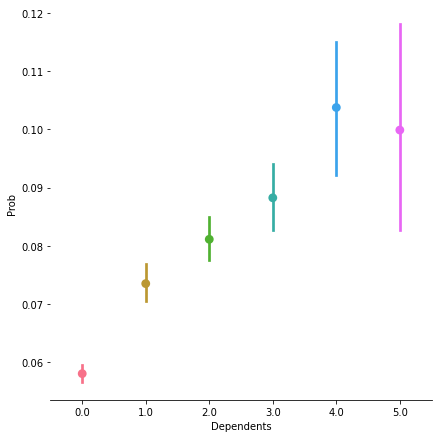

In [33]:
plot  = sns.factorplot(x="Dependents",y="Target",data=train ,size = 6 , 
palette = "husl")
plot.despine(left=True)
plot = plot.set_ylabels("Prob")

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TotalAmountOverCreditLimit  150000 non-null  int8   
 1   age                         150000 non-null  int8   
 2   Count3059                   150000 non-null  int64  
 3   DebtRatio                   150000 non-null  int8   
 4   Salary                      150000 non-null  int8   
 5   NumberOfOpenCredits         150000 non-null  int8   
 6   Count90                     150000 non-null  int64  
 7   NumberOfArrests             150000 non-null  int64  
 8   Count6089                   150000 non-null  int64  
 9   Dependents                  150000 non-null  float64
 10  Target                      150000 non-null  int64  
dtypes: float64(1), int64(5), int8(5)
memory usage: 7.6 MB


In [35]:
Y = train['Target']
X = train.drop('Target',axis=1)

X = pd.get_dummies(X, columns = ["TotalAmountOverCreditLimit"], prefix="TotalAmountOverCreditLimit")
X = pd.get_dummies(X, columns = ["age"], prefix="age")
X = pd.get_dummies(X, columns = ["Count3059"], prefix="Count3059")
X = pd.get_dummies(X, columns = ["DebtRatio"], prefix="DebtRatio")
X = pd.get_dummies(X, columns = ["Salary"], prefix="Salary")
X = pd.get_dummies(X, columns = ["NumberOfOpenCredits"], prefix="NumberOfOpenCredits")
X = pd.get_dummies(X, columns = ["Count90"], prefix="Count90")
X = pd.get_dummies(X, columns = ["NumberOfArrests"], prefix="NumberOfArrests")
X = pd.get_dummies(X, columns = ["Count6089"], prefix="Count6089")
X = pd.get_dummies(X, columns = ["Dependents"], prefix="Dependents")

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)
X_test.shape

(49500, 71)

In [36]:
randomFC = RandomForestClassifier(n_estimators=50, max_features='sqrt')
randomFC.fit(X_train,Y_train)


RandomForestClassifier(max_features='sqrt', n_estimators=50)

In [37]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = randomFC.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

<AxesSubplot:ylabel='feature'>

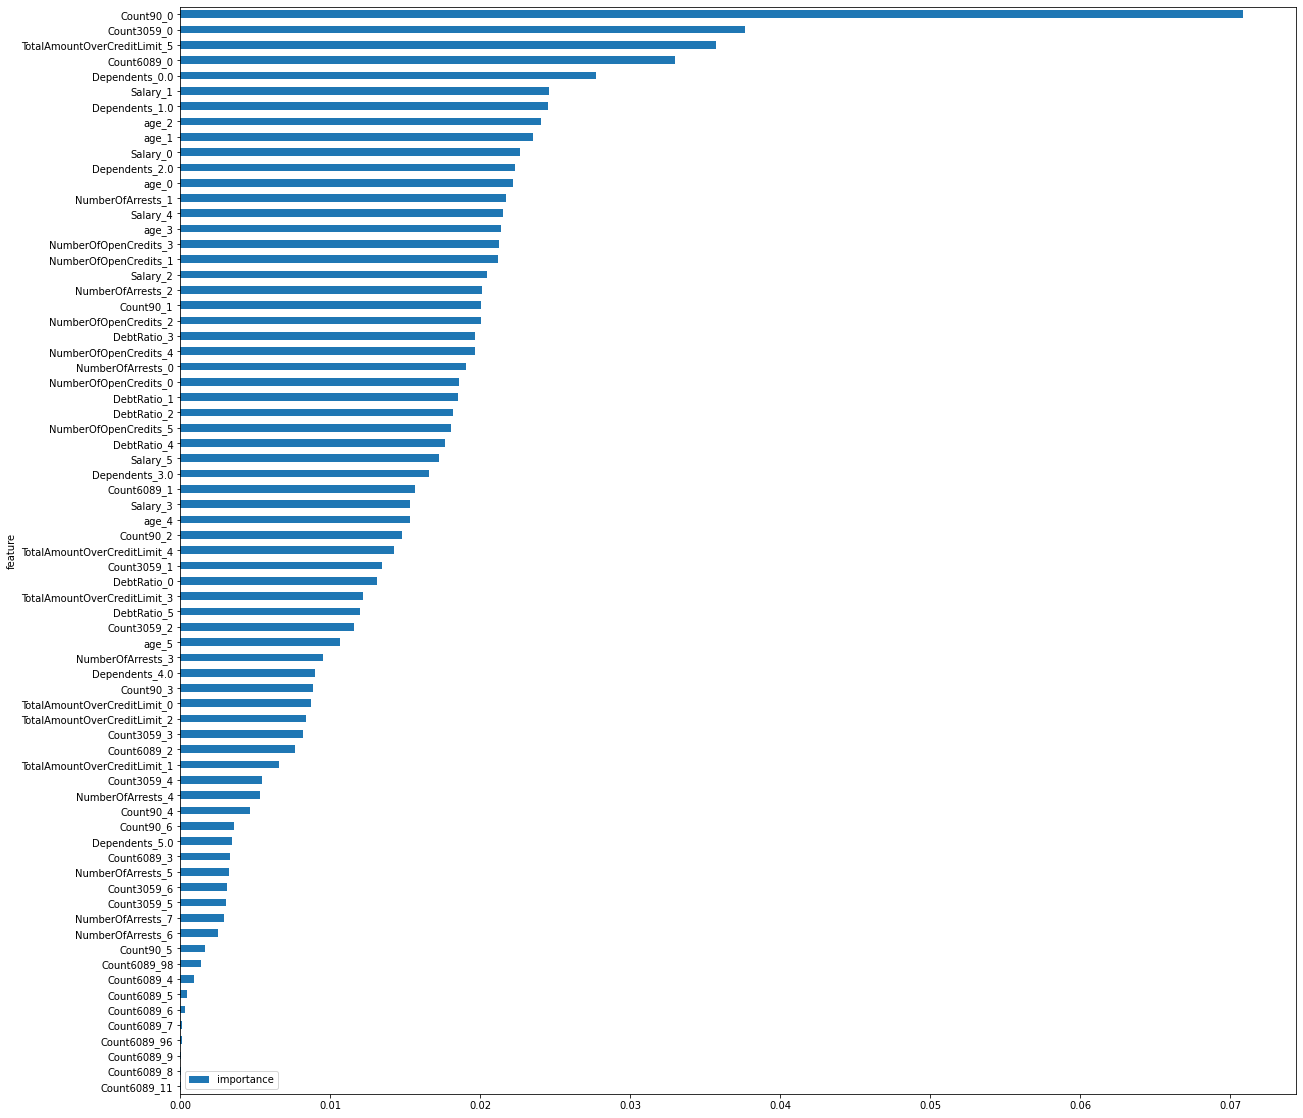

In [38]:
features.plot(kind='barh', figsize=(20, 20))


In [39]:
y_pred = randomFC.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9294949494949495

In [40]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold

from xgboost import XGBClassifier

import matplotlib as mpl
import matplotlib.pyplot as plt


In [41]:
# final XGBoost model for auc
eval_set = [(X_train, Y_train), (X_test, Y_test)]
eval_metric = ["auc","error"]

xgb = XGBClassifier(max_depth=3, learning_rate=0.01, n_estimators=1000, gamma=1,scale_pos_weight=4, min_child_weight=2)
xgb.fit(X_train,Y_train, verbose =False,eval_set=eval_set, eval_metric=eval_metric)

# prediction
X_test_xgb = X_test
y_pred_xgb = xgb.predict_proba(X_test_xgb)


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [42]:
y_pred_xgb

array([[0.968119  , 0.03188096],
       [0.9536047 , 0.04639531],
       [0.9514825 , 0.04851755],
       ...,
       [0.9681385 , 0.03186148],
       [0.87465715, 0.12534285],
       [0.8567874 , 0.1432126 ]], dtype=float32)

In [48]:
y_pred_new = []
for i in range(len(y_pred_xgb)):
    if y_pred_xgb[i][1] > 0.45:
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)



              precision    recall  f1-score   support

           0       0.97      0.93      0.95     46247
           1       0.37      0.54      0.44      3253

    accuracy                           0.91     49500
   macro avg       0.67      0.74      0.70     49500
weighted avg       0.93      0.91      0.92     49500



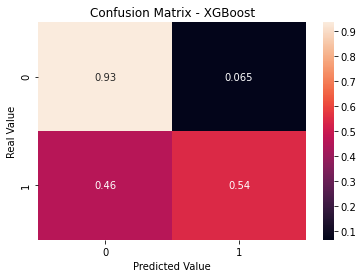

Accuracy: 90.91%


In [49]:
# classification report
print(classification_report(Y_test, y_pred_new))


# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_test, y_pred_new, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - XGBoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

accuracy = accuracy_score(Y_test, y_pred_new)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [45]:
results = xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

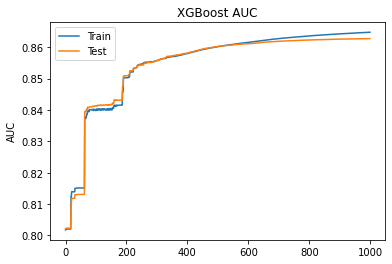

In [46]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

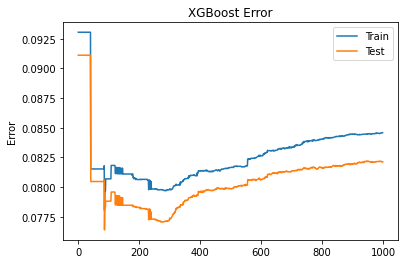

In [47]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Error')
plt.title('XGBoost Error')
plt.show()